In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("music_genre.csv")
print(data.head())

# C'est un dataset qui contient des informations sur les genres musicaux et les artistes qui les ont créés.

   instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.2

In [3]:
print(data.shape)

# 50005 lignes

(50005, 18)


In [4]:
print(data.columns)
print(len(data.columns))

# 18 colonnes

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')
18


In [5]:
print(data.music_genre.unique())
print(data.music_genre.value_counts())

# 10 genres de musique, 5000 éléments par genre

['Electronic' 'Anime' nan 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues'
 'Rock' 'Classical' 'Hip-Hop']
music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64


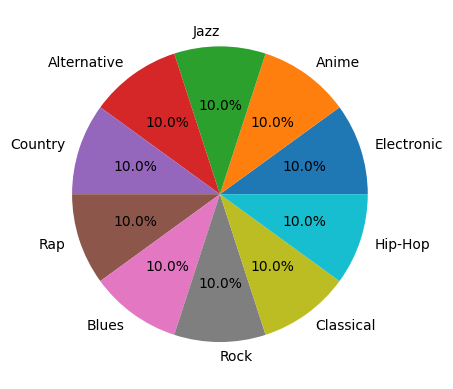

In [6]:
labels = data.music_genre.value_counts().index
sizes = data.music_genre.value_counts().values

fig = plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.show()

# la donnée est distribuée uniformément entre les genres de musique

In [7]:
colonnesCat = [x for x in data.columns if data[x].dtype == object]
colonnesNum = [x for x in data.columns if data[x].dtype == float]

print(f"Colonnes catégoriques: {len(colonnesCat)} ({colonnesCat})")
print(f"Colonnes numériques: {len(colonnesNum)} ({colonnesNum})")

Colonnes catégoriques: 7 (['artist_name', 'track_name', 'key', 'mode', 'tempo', 'obtained_date', 'music_genre'])
Colonnes numériques: 11 (['instance_id', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence'])
object


# Apprentissage Machine


#### Imports


In [8]:
import numpy as np
import xgboost as XGB
from keras import layers, models
from sklearn.calibration import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight

In [9]:
df_music_genre = data.drop(
    [
        "instance_id",
        "artist_name",
        "track_name",
        "key",
        "mode",
        "obtained_date",
    ],
    axis=1,
).dropna()

# Nous enlevons les valeurs non numeriques pour le tempo
df_music_genre = df_music_genre.drop(
    df_music_genre[df_music_genre["tempo"] == "?"].index
)

# Nous redefinissons le type de tempo en float
df_music_genre["tempo"] = df_music_genre["tempo"].astype(float)

df_music_genre

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,0.119,-7.022,0.2980,98.028,0.330,Hip-Hop
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,0.0550,122.043,0.113,Hip-Hop
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,0.1460,131.079,0.395,Hip-Hop
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,0.0441,75.886,0.354,Hip-Hop


In [10]:
colonnesCat = [x for x in df_music_genre.columns if df_music_genre[x].dtype == object]
colonnesNum = [x for x in df_music_genre.columns if df_music_genre[x].dtype == float]

print(f"Colonnes catégoriques: {len(colonnesCat)} ({colonnesCat})")
print(f"Colonnes numériques: {len(colonnesNum)} ({colonnesNum})")

Colonnes catégoriques: 1 (['music_genre'])
Colonnes numériques: 11 (['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'])


In [11]:
# Separate features and target
X = df_music_genre.drop("music_genre", axis=1)
y = df_music_genre["music_genre"]

# Split the data into training and testing sets: 80% as train and 20% as test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [12]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

### Régression Logistique


In [13]:
# Create a pipeline to scale the data and then fit the Logistic Regression model
pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("logistic_regression", LogisticRegression(max_iter=1000)),
    ]
)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression(max_iter=1000))])

La régression logistique consiste à trouver une fonction linéaire C(X) qui permette d'estimer la probabilité de Y=1 connaissant X : p(Y=1|X)=eC(X)1+eC(X)

Autrement dit, cela revient à trouver une séparation linéaire des caractéristiques qui minimise un critère d'erreur.

On veut maintenant prédire le genre musical à partir de toutes les caractéristiques, et évaluer la qualité de cette prédiction en utilisant la régression logistique définie dans la librairie sklearn.

On entraîne le modèle de régression logistique avec fit.

On peut prédire les valeurs sur l'ensemble de test avec le modèle entraîné.

La mesure de pertinence compte le nombre de fois où l'algorithme a fait une bonne prédiction (en pourcentage) :


In [14]:
# Predict on the test set
y_lr_encoded = pipeline.predict(X_test)
y_lr = label_encoder.inverse_transform(y_lr_encoded)

# Calculate accuracy
lr_score = accuracy_score(y_test_encoded, y_lr_encoded)
print("Accuracy:", lr_score)

print(
    classification_report(
        y_test_encoded,
        y_lr_encoded,
        target_names=label_encoder.classes_,
        zero_division=1,
    )
)

Accuracy: 0.5292092403376277
              precision    recall  f1-score   support

 Alternative       0.37      0.27      0.31       916
       Anime       0.62      0.63      0.62       878
       Blues       0.52      0.48      0.50       889
   Classical       0.80      0.83      0.81       891
     Country       0.41      0.54      0.47       910
  Electronic       0.59      0.60      0.59       862
     Hip-Hop       0.48      0.49      0.48       940
        Jazz       0.50      0.41      0.45       901
         Rap       0.49      0.39      0.44       905
        Rock       0.51      0.67      0.58       912

    accuracy                           0.53      9004
   macro avg       0.53      0.53      0.53      9004
weighted avg       0.53      0.53      0.52      9004



L'accuracy est de 0,52 ce qui n'est pas beaucoup, mais cela n'est pas étonnant vu le nombre de classes que nous avons (10) et la similiraité des genres entre eux.


### XGBoost


La méthode XGBoost est dérivée des arbres de décision, et très efficace, en particulier pour de grandes quantités de données.


In [15]:
class_weights = compute_class_weight(
    "balanced", classes=np.unique(y_train_encoded), y=y_train_encoded
)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

xgb = XGB.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb.fit(
    X_train,
    y_train_encoded,
    sample_weight=[class_weight_dict[cls] for cls in y_train_encoded],
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [16]:
# Predict on the test set
y_xgb_encoded = xgb.predict(X_test)
y_xgb = label_encoder.inverse_transform(y_xgb_encoded)

# Calculate accuracy
xgb_score = accuracy_score(y_test_encoded, y_xgb_encoded)
print("Accuracy:", xgb_score)

print(
    classification_report(
        y_test_encoded,
        y_xgb_encoded,
        target_names=label_encoder.classes_,
        zero_division=1,
    )
)

Accuracy: 0.5681919147045758
              precision    recall  f1-score   support

 Alternative       0.44      0.38      0.41       916
       Anime       0.82      0.76      0.79       878
       Blues       0.59      0.54      0.56       889
   Classical       0.84      0.85      0.85       891
     Country       0.60      0.56      0.58       910
  Electronic       0.67      0.65      0.66       862
     Hip-Hop       0.38      0.39      0.39       940
        Jazz       0.55      0.55      0.55       901
         Rap       0.34      0.35      0.35       905
        Rock       0.51      0.68      0.58       912

    accuracy                           0.57      9004
   macro avg       0.57      0.57      0.57      9004
weighted avg       0.57      0.57      0.57      9004



L'accuracy est de 0.57, ce qui est meilleur que celui de "Logistic Regression", mais toujours cela n'est pas beaucoup.


### Deep Learning


In [17]:
estimator_model = models.Sequential(
    [
        layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation="relu"),
        layers.Dense(len(np.unique(y_train_encoded)), activation="softmax"),
    ]
)

estimator_model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Convert class_weight_dict to TensorFlow-compatible format
class_weights_tf = {
    i: class_weight_dict[i] for i in range(len(np.unique(y_train_encoded)))
}

# Train the model
history = estimator_model.fit(
    X_train,
    y_train_encoded,
    epochs=10,
    batch_size=32,
    class_weight=class_weights_tf,
    validation_split=0.1,
)

Epoch 1/10


/Users/bw/Desktop/Dev/ProjetDataSciences/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1013/1013 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step - accuracy: 0.1125 - loss: 1928.6012 - val_accuracy: 0.1155 - val_loss: 516.0315
Epoch 2/10
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.1220 - loss: 544.4711 - val_accuracy: 0.1177 - val_loss: 434.7459
Epoch 3/10
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.1303 - loss: 461.2300 - val_accuracy: 0.1185 - val_loss: 391.1017
Epoch 4/10
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.1274 - loss: 405.3339 - val_accuracy: 0.1185 - val_loss: 519.0056
Epoch 5/10
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.1340 - loss: 371.0764 - val_accuracy: 0.1219 - val_loss: 266.4930
Epoch 6/10
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.1320 - loss: 291.1617 - val_accuracy: 0.1591 - val_loss: 95.3535
Epoch 7/10
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.1324 - loss: 123.4688 - val_accuracy: 0.1238 - val_loss: 2.2450
Epoch 8/10
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - acc

In [18]:
# Predict on the test set
y_pred = np.argmax(estimator_model.predict(X_test), axis=-1)

# Optionally decode the predicted labels back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred_labels, zero_division=1))

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step
Accuracy: 0.12983118613949357
              precision    recall  f1-score   support

 Alternative       0.00      0.00      0.00       916
       Anime       0.44      0.07      0.12       878
       Blues       1.00      0.00      0.00       889
   Classical       0.69      0.08      0.14       891
     Country       0.10      0.96      0.19       910
  Electronic       0.81      0.02      0.04       862
     Hip-Hop       0.52      0.04      0.07       940
        Jazz       0.36      0.05      0.09       901
         Rap       0.43      0.02      0.04       905
        Rock       0.32      0.05      0.09       912

    accuracy                           0.13      9004
   macro avg       0.47      0.13      0.08      9004
weighted avg       0.46      0.13      0.08      9004



L'accuracy est de 0.13, ce qui n'est pas suffisant du tout.


### Random Forest Classifier


In [19]:
# Création et entraînement du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=35, max_depth=15, min_samples_leaf=4)
rf_model.fit(X_train, y_train_encoded)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, n_estimators=35)

In [20]:
# Prédiction sur l'ensemble de test
y_rf_encoded = rf_model.predict(X_test)
y_rf = label_encoder.inverse_transform(y_rf_encoded)

In [21]:
# Évaluation du modèle
rf_accuracy = accuracy_score(y_test_encoded, y_rf_encoded)
print("Accuracy:", rf_accuracy)
print(
    classification_report(
        y_test_encoded,
        y_rf_encoded,
        target_names=label_encoder.classes_,
        zero_division=1,
    )
)

Accuracy: 0.5658596179475789
              precision    recall  f1-score   support

 Alternative       0.48      0.35      0.40       916
       Anime       0.77      0.74      0.75       878
       Blues       0.59      0.52      0.55       889
   Classical       0.85      0.85      0.85       891
     Country       0.60      0.55      0.57       910
  Electronic       0.64      0.61      0.62       862
     Hip-Hop       0.40      0.40      0.40       940
        Jazz       0.54      0.56      0.55       901
         Rap       0.35      0.34      0.35       905
        Rock       0.50      0.76      0.60       912

    accuracy                           0.57      9004
   macro avg       0.57      0.57      0.56      9004
weighted avg       0.57      0.57      0.56      9004



### KNN


Nous voulons utiliser l'algorithme KNN pour la classification.


In [22]:
nb_voisins = len(y.value_counts())
print(nb_voisins)

knn = KNeighborsClassifier(n_neighbors=nb_voisins)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

10
Accuracy: 0.18
Classification Report:
              precision    recall  f1-score   support

 Alternative       0.13      0.23      0.17       916
       Anime       0.22      0.28      0.24       878
       Blues       0.13      0.14      0.13       889
   Classical       0.33      0.35      0.34       891
     Country       0.15      0.19      0.17       910
  Electronic       0.17      0.16      0.17       862
     Hip-Hop       0.15      0.11      0.13       940
        Jazz       0.17      0.11      0.13       901
         Rap       0.17      0.11      0.13       905
        Rock       0.17      0.10      0.13       912

    accuracy                           0.18      9004
   macro avg       0.18      0.18      0.17      9004
weighted avg       0.18      0.18      0.17      9004



Nous remarquons que la précision n'est pas très bonne.


In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(
    n_neighbors=nb_voisins
)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.51
Classification Report:
              precision    recall  f1-score   support

 Alternative       0.33      0.35      0.34       916
       Anime       0.71      0.71      0.71       878
       Blues       0.53      0.48      0.51       889
   Classical       0.81      0.84      0.82       891
     Country       0.41      0.52      0.46       910
  Electronic       0.65      0.53      0.59       862
     Hip-Hop       0.40      0.47      0.43       940
        Jazz       0.52      0.45      0.48       901
         Rap       0.36      0.29      0.32       905
        Rock       0.47      0.53      0.50       912

    accuracy                           0.51      9004
   macro avg       0.52      0.51      0.52      9004
weighted avg       0.52      0.51      0.51      9004



Nous observons que l'ajout du Scaler nous a permi de gagner significativement en précision, cependant, 0.50 n'est toujours pas satisfaisant pour notre modèle.


In [24]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(
    n_neighbors=nb_voisins
)  # You can adjust the number of neighbors
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.28
Classification Report:
              precision    recall  f1-score   support

 Alternative       0.15      0.17      0.16       916
       Anime       0.28      0.37      0.32       878
       Blues       0.18      0.19      0.18       889
   Classical       0.74      0.81      0.77       891
     Country       0.14      0.15      0.14       910
  Electronic       0.16      0.12      0.14       862
     Hip-Hop       0.31      0.37      0.34       940
        Jazz       0.28      0.25      0.26       901
         Rap       0.25      0.21      0.23       905
        Rock       0.17      0.11      0.13       912

    accuracy                           0.28      9004
   macro avg       0.27      0.28      0.27      9004
weighted avg       0.27      0.28      0.27      9004



Nous observons une baisse dans la précision de la prédiction
Testons maintenant en faisant varier la dimensionnalité des données d'entrainement.


In [25]:
for i in range(1, 12):
    pca = PCA(n_components=i)

    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier(
        n_neighbors=nb_voisins
    )  # You can adjust the number of neighbors
    knn.fit(X_train_pca, y_train)

    y_pred = knn.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Dimensionnalité: {i}, Accuracy: {accuracy:.2f}")

Dimensionnalité: 1, Accuracy: 0.21
Dimensionnalité: 2, Accuracy: 0.28
Dimensionnalité: 3, Accuracy: 0.33
Dimensionnalité: 4, Accuracy: 0.36
Dimensionnalité: 5, Accuracy: 0.38
Dimensionnalité: 6, Accuracy: 0.41
Dimensionnalité: 7, Accuracy: 0.47
Dimensionnalité: 8, Accuracy: 0.49
Dimensionnalité: 9, Accuracy: 0.51
Dimensionnalité: 10, Accuracy: 0.51
Dimensionnalité: 11, Accuracy: 0.51


Nous observons que nous ne gagnons rien lorsque nous ajoutons de la réduction de dimensionnalité PCA.
Testons maintenant avec LDA


In [26]:
for i in range(1, 10):
    lda = LDA(n_components=i)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)

    knn = KNeighborsClassifier(
        n_neighbors=nb_voisins
    )  # You can adjust the number of neighbors
    knn.fit(X_train_lda, y_train)

    y_pred = knn.predict(X_test_lda)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Dimensionnalité: {i}, Accuracy: {accuracy:.2f}")

Dimensionnalité: 1, Accuracy: 0.28
Dimensionnalité: 2, Accuracy: 0.39
Dimensionnalité: 3, Accuracy: 0.47
Dimensionnalité: 4, Accuracy: 0.50
Dimensionnalité: 5, Accuracy: 0.51
Dimensionnalité: 6, Accuracy: 0.52
Dimensionnalité: 7, Accuracy: 0.52
Dimensionnalité: 8, Accuracy: 0.52
Dimensionnalité: 9, Accuracy: 0.52


## Conclusion


- faire un tableau avec tous les modèles et leurs scores
- faire une fonction pour les scores
- donner la meilleure méthode pour ce dataset
